In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("netflix_titles_cleaned.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# keep useful columns for the defined questions
df_filtered = df[['type', 'release_year', 'rating', 'duration', 'country']]
df_filtered.head()


,type,release_year,rating,duration,country
0,Movie,2020,PG-13,90 min,United States
1,TV Show,2021,TV-MA,2 Seasons,South Africa
2,TV Show,2021,TV-MA,1 Season,NaN
3,TV Show,2021,TV-MA,1 Season,NaN
4,TV Show,2021,TV-MA,2 Seasons,India


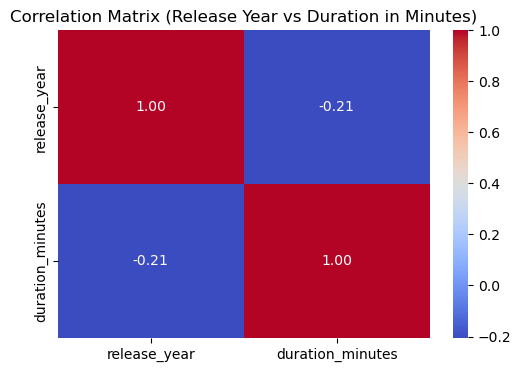

In [7]:
# Converting duration to numeric (only for rows that are movies with 'min')
df_numeric = df[df['duration'].str.contains('min', na=False)].copy()
df_numeric['duration_minutes'] = df_numeric['duration'].str.extract(r'(\d+)').astype(float)


# Keeping only numeric columns: release_year and duration_minutes
corr_df = df_numeric[['release_year', 'duration_minutes']].copy()

# Creating correlation matrix
correlation_matrix = corr_df.corr()

# Plotting heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Release Year vs Duration in Minutes)')
plt.show()


### Correlation Matrix Interpretation

This heatmap shows the correlation between two numeric variables: `release_year` and `duration_minutes` (only for movies). The correlation coefficient is relatively low, suggesting there is no strong linear relationship between when a movie was released and how long it is. In other words, movie length hasn't consistently increased or decreased over the years.

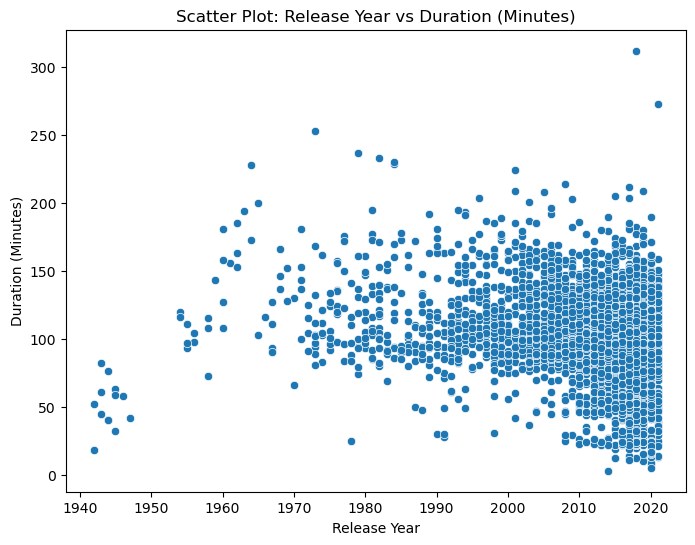

In [6]:
# Creating a Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numeric, x='release_year', y='duration_minutes')
plt.title('Scatter Plot: Release Year vs Duration (Minutes)')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()


This scatter plot shows the relationship between a movie or show's release year and its duration in minutes.

Key Observations

    - Most movies are between 80–120 minutes, regardless of the release year, showing a consistent standard length for films.

    - There’s no strong trend between release year and duration, meaning newer movies aren’t significantly longer or shorter than older ones.

    - The number of releases increases sharply after 2000, likely reflecting Netflix’s rapid growth and content expansion during this period.


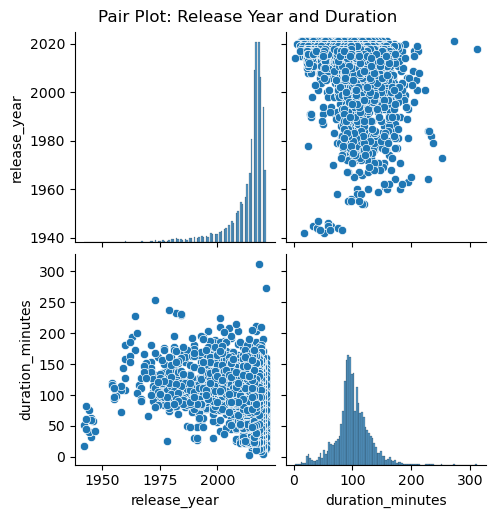

In [8]:
# Selecting only numeric columns for pair plot
numeric_df = df_numeric[['release_year', 'duration_minutes']]

# Creating the pair plot
sns.pairplot(numeric_df)
plt.suptitle("Pair Plot: Release Year and Duration", y=1.02)
plt.show()


## Pair Plot Interpretation

The pair plot reveals several insights:

    - Release Year Distribution: Most content was released after the year 2000, with a significant spike after 2015. This suggests Netflix's catalog heavily emphasizes more recent titles.

    - Duration Distribution: The majority of titles have a duration between 60 and 120 minutes, consistent with standard feature-length films.

    - Release Year vs. Duration: There’s no clear linear relationship between release year and duration. However, older titles (before 1980) show more variability in length, while newer titles tend to cluster more tightly around the average duration.

These patterns may suggest that Netflix has standardized its content length in recent years, possibly to cater to viewer preferences or production guidelines.

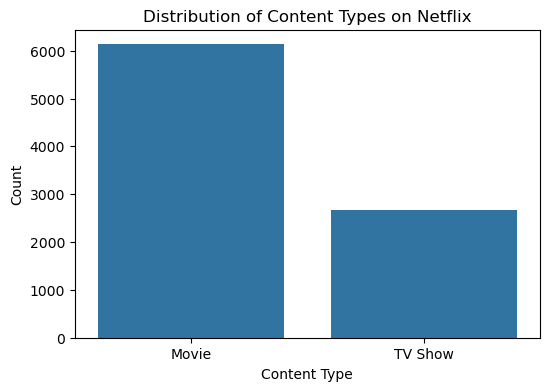

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type')  # or use df_titles or your actual DataFrame name
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


## Interpretation

This count plot reveals that Movies make up the majority of Netflix s content, with over 6,000 entries, 
compared to around 2,500 TV Shows. 
This indicates that Netflix heavily invests in movie content, possibly due to shorter production 
cycles and higher global appeal compared to episodic content like TV shows. 

It also suggests that movie content dominates user offerings and could influence user engagement patterns.


## Questions We Can Answer So Far

Q1: What is the most common type of content on Netflix?
Movies are the most common content type, significantly outnumbering TV shows according to the count plot.

Q2: Has the average duration of movies changed over the years?
The scatter plot shows no strong upward or downward trend in movie durations over time, suggesting stability.
    
## New Questions That Emerged

    - Are movies getting shorter or longer over time by genre?

    - Do newer releases tend to have more diverse cast countries?

    - Are there regional preferences for certain content types (Movie vs. TV Show)?
    

## Hypothesis: The number of new titles added to Netflix has significantly increased in the last 5 years.
